# Experiment 1 – Rain or Not (+7 days)
**Student ID:** 25506751  

## Objective
Build a binary classification model to predict if it will rain exactly 7 days from a given date, using historical weather features.


In [15]:
%pip install pandas numpy matplotlib seaborn scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [6]:
# Load dataset (upload training_data_sample.csv into Colab files first)
df = pd.read_csv("/Users/oishik/Documents/AT2_submission/experimentation_repo/notebooks/dataset.csv")
df.head()

,date,dayofyear_sin,dayofyear_cos,precip_last_1,precip_last_3,precip_last_7,temp_max_mean_7,temp_min_mean_7,precip_hours_last_7,weathercode,will_rain_plus7,precip_next_3days
0,2023-01-01,0.017202,0.999852,10.293861,10.293861,10.293861,18.529584,5.323336,6,61,0,16.87
1,2023-01-02,0.034398,0.999408,0.000000,10.293861,10.293861,17.167908,4.973973,6,80,0,21.43
2,2023-01-03,0.051584,0.998669,13.354692,23.648553,23.648553,17.102202,4.723854,13,1,0,17.36
3,2023-01-04,0.068755,0.997634,3.516915,16.871607,27.165467,17.703014,4.664940,17,61,1,13.84
4,2023-01-05,0.085906,0.996303,4.557101,21.428708,31.722568,17.916828,4.288141,20,63,0,9.28


Rows, Cols: (358, 12)
Missing values per column:
 date                   0
dayofyear_sin          0
dayofyear_cos          0
precip_last_1          0
precip_last_3          0
precip_last_7          0
temp_max_mean_7        0
temp_min_mean_7        0
precip_hours_last_7    0
weathercode            0
will_rain_plus7        0
precip_next_3days      0
dtype: int64


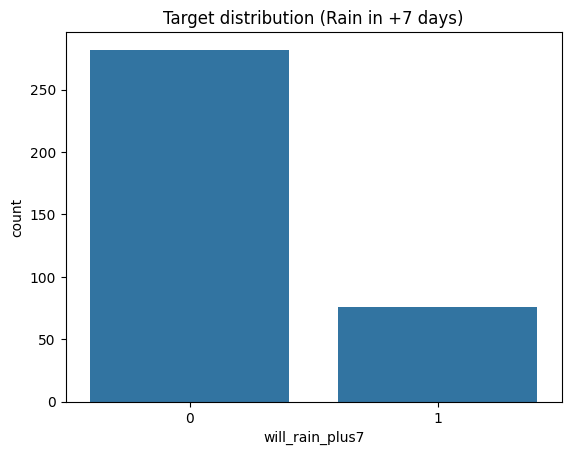

will_rain_plus7
0    0.787709
1    0.212291
Name: proportion, dtype: float64

In [7]:
print("Rows, Cols:", df.shape)
print("Missing values per column:\n", df.isnull().sum())

# Target distribution
sns.countplot(x=df['will_rain_plus7'])
plt.title('Target distribution (Rain in +7 days)')
plt.show()

df['will_rain_plus7'].value_counts(normalize=True)


In [8]:
FEATURE_COLS = [
    "dayofyear_sin","dayofyear_cos","precip_last_1","precip_last_3","precip_last_7",
    "temp_max_mean_7","temp_min_mean_7","precip_hours_last_7","weathercode"
]
X = df[FEATURE_COLS]
y = df['will_rain_plus7']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape


((286, 9), (72, 9))

In [9]:
clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, pred))
print("AUC:", roc_auc_score(y_test, proba))
print(classification_report(y_test, pred))


Accuracy: 0.7638888888888888
AUC: 0.6467836257309941
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        57
           1       0.33      0.13      0.19        15

    accuracy                           0.76        72
   macro avg       0.57      0.53      0.53        72
weighted avg       0.71      0.76      0.72        72



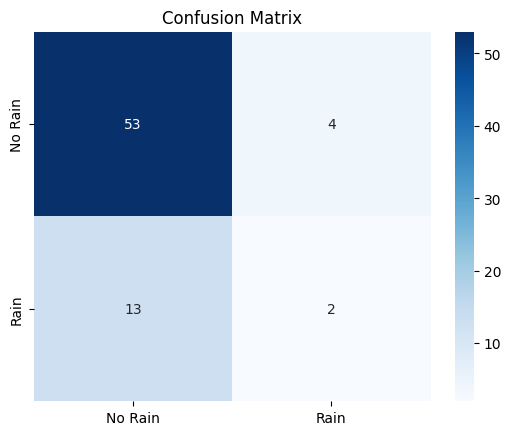

In [10]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Rain","Rain"], yticklabels=["No Rain","Rain"])
plt.title("Confusion Matrix")
plt.show()


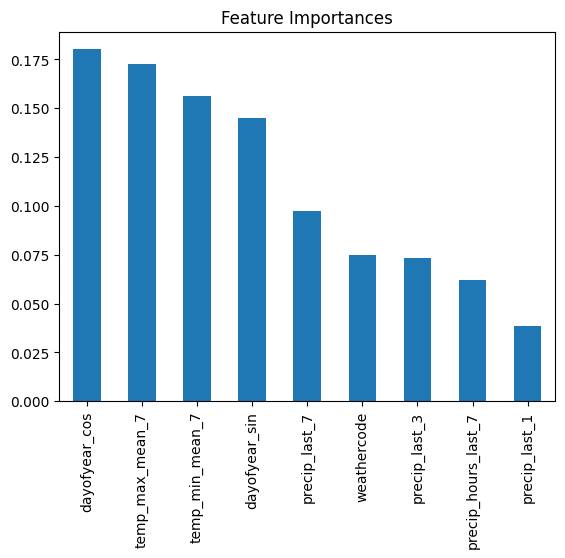

dayofyear_cos          0.180157
temp_max_mean_7        0.172372
temp_min_mean_7        0.156236
dayofyear_sin          0.145026
precip_last_7          0.097255
weathercode            0.074941
precip_last_3          0.073435
precip_hours_last_7    0.062249
precip_last_1          0.038329
dtype: float64

In [11]:
importances = pd.Series(clf.feature_importances_, index=FEATURE_COLS).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title("Feature Importances")
plt.show()

importances


In [20]:
import joblib

# Save classifier into experimentation repo
joblib.dump(clf, "/Users/oishik/Documents/AT2_submission/experimentation_repo/models/rain_or_not/rain_model.pkl")

# Also save a copy into API repo
joblib.dump(clf, "/Users/oishik/Documents/AT2_submission/experimentation_repo/api/rain_model.pkl")

print("Rain classifier model saved successfully!")

Rain classifier model saved successfully!


## Discussion
- The dataset is slightly imbalanced (more no-rain days).
- Accuracy and AUC show predictive ability; AUC > 0.7 is considered useful.
- Strongest predictors: recent precipitation features and day-of-year seasonality.
- Improvements:
  - Class balancing (SMOTE or weights),
  - Hyperparameter tuning,
  - Try alternative models (XGBoost, LightGBM).
